# Labs:

* Lab | Handling Data Imbalance in Classification Models
* Lab | Cross Validation
* Lab | Random Forests

## Lab | Handling Data Imbalance in Classification Models

For this lab and in the next lessons we will build a model on customer churn binary classification problem. You will be using files_for_lab/Customer-Churn.csv file.

### Scenario

You are working as an analyst with this internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.

### Instructions

In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned on the class.

Here is the list of steps to be followed (building a simple model without balancing the data):

1. Import the required libraries and modules that you would need.
2. Read that data into Python and call the dataframe churnData.
3. Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.
4. Check for null values in the dataframe. Replace the null values.
5. Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
6. Scale the features either by using normalizer or a standard scaler.
7. Split the data into a training set and a test set.
8. Fit a logistic regression model on the training data.
9. Check the accuracy on the test data.
Note: So far we have not balanced the data.

### Managing imbalance in the dataset

10. Check for the imbalance.
11. Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
Each time fit the model and see how the accuracy of the model is.

### 1.

In [1]:
import pandas as pd
import numpy as np
import statistics

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

### 2.

In [2]:
data = pd.read_csv('Customer-Churn.csv')
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


### 3. Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [4]:
data[data['TotalCharges'] == ' ' ]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,Yes,No,Yes,Yes,Yes,No,Two year,52.55,,No
753,Male,0,No,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,20.25,,No
936,Female,0,Yes,Yes,0,Yes,Yes,Yes,Yes,No,Yes,Yes,Two year,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,25.75,,No
1340,Female,0,Yes,Yes,0,No,Yes,Yes,Yes,Yes,Yes,No,Two year,56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,No,Yes,Yes,Yes,Yes,No,Two year,73.35,,No


In [5]:
data['TotalCharges'].value_counts(dropna = False)

20.2      11
          11
19.75      9
19.9       8
20.05      8
          ..
414.1      1
6152.3     1
2664.3     1
938.65     1
356.65     1
Name: TotalCharges, Length: 6531, dtype: int64

In [6]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors = 'coerce')

errors : {‘ignore’, ‘raise’, ‘coerce’}, default ‘raise’
- If ‘raise’, then invalid parsing will raise an exception
- If ‘coerce’, then invalid parsing will be set as NaN
- If ‘ignore’, then invalid parsing will return the input

In [7]:
data['TotalCharges'].value_counts(dropna = False)

NaN        11
20.20      11
19.75       9
19.90       8
19.65       8
           ..
1066.15     1
249.95      1
8333.95     1
7171.70     1
1024.00     1
Name: TotalCharges, Length: 6531, dtype: int64

In [8]:
#it's only 11 so we drop the NANs 
data = data.dropna(subset=['TotalCharges'])
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.50,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.60,Yes


In [9]:
data = data.reset_index().drop('index', axis = 1)
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.50,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.50,No
7028,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.90,No
7029,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7030,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.60,Yes


In [10]:
data['TotalCharges'].isna().sum()

0

In [11]:
data['Churn'].value_counts(dropna = False)

No     5163
Yes    1869
Name: Churn, dtype: int64

## 5 - 6 - 7
5. Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
6. Scale the features either by using normalizer or a standard scaler.
7. Split the data into a training set and a test set.

In [12]:
X = data[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']]
y = data[['Churn']]

In [14]:
X

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,1,0,29.85,29.85
1,34,0,56.95,1889.50
2,2,0,53.85,108.15
3,45,0,42.30,1840.75
4,2,0,70.70,151.65
...,...,...,...,...
7027,24,0,84.80,1990.50
7028,72,0,103.20,7362.90
7029,11,0,29.60,346.45
7030,4,1,74.40,306.60


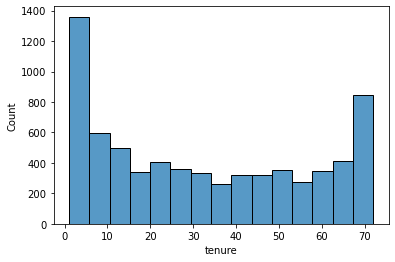

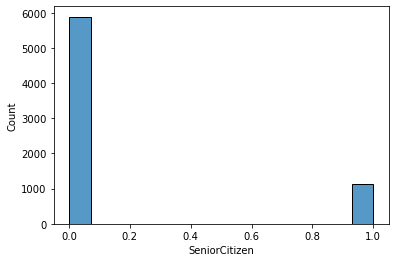

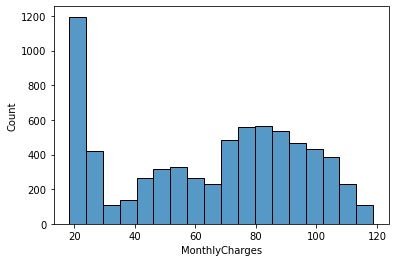

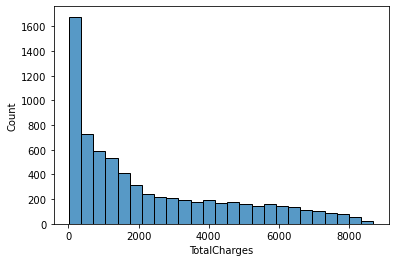

<Figure size 432x288 with 0 Axes>

In [15]:
for i in X.columns:
    sns.histplot(data[i])
    plt.figure()

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
#using standard scaler
scaler = StandardScaler()
X_t = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X_t

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,-1.280248,-0.440327,-1.161694,-0.994194
1,0.064303,-0.440327,-0.260878,-0.173740
2,-1.239504,-0.440327,-0.363923,-0.959649
3,0.512486,-0.440327,-0.747850,-0.195248
4,-1.239504,-0.440327,0.196178,-0.940457
...,...,...,...,...
7027,-0.343137,-0.440327,0.664868,-0.129180
7028,1.612573,-0.440327,1.276493,2.241056
7029,-0.872808,-0.440327,-1.170004,-0.854514
7030,-1.158016,2.271039,0.319168,-0.872095


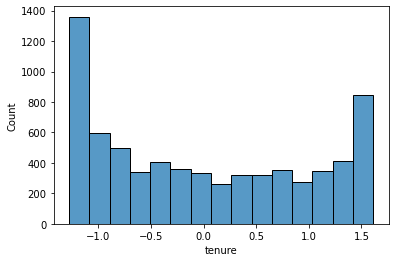

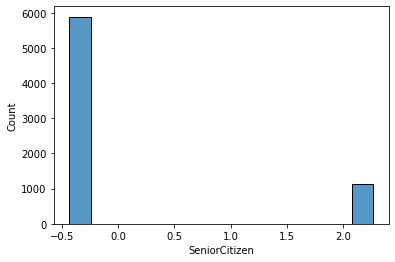

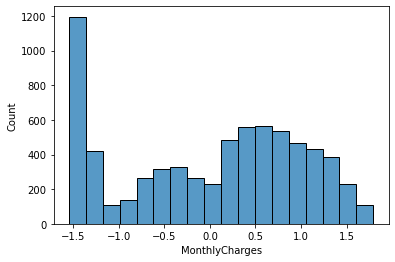

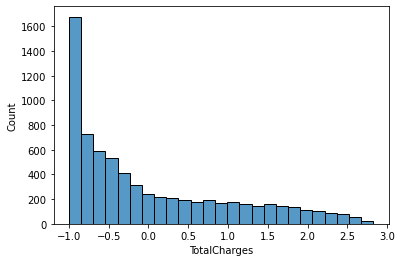

<Figure size 432x288 with 0 Axes>

In [18]:
for i in X_t.columns:
    sns.histplot(X_t[i])
    plt.figure()

In [19]:
#Checking X & y 
X  = X_t
X

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,-1.280248,-0.440327,-1.161694,-0.994194
1,0.064303,-0.440327,-0.260878,-0.173740
2,-1.239504,-0.440327,-0.363923,-0.959649
3,0.512486,-0.440327,-0.747850,-0.195248
4,-1.239504,-0.440327,0.196178,-0.940457
...,...,...,...,...
7027,-0.343137,-0.440327,0.664868,-0.129180
7028,1.612573,-0.440327,1.276493,2.241056
7029,-0.872808,-0.440327,-1.170004,-0.854514
7030,-1.158016,2.271039,0.319168,-0.872095


In [20]:
y

,Churn
0,No
1,No
2,Yes
3,No
4,Yes
...,...
7027,No
7028,No
7029,No
7030,Yes


## 8 - 9
8. Fit a logistic regression model on the training data.
9. Check the accuracy on the test data.

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.metrics import plot_confusion_matrix

In [22]:
X_train, X_test, y_train, y_test = train_test_split \
            (X, y, test_size=0.2, random_state=42)

In [23]:
clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)
predictions = clf.predict(X_test)

Confusion matrix
[[935 211]
 [ 98 163]]
-------------------------------------------------------
Accuracy score
0.7803837953091685
-------------------------------------------------------
Classification report
              precision    recall  f1-score   support

          No       0.91      0.82      0.86      1146
         Yes       0.44      0.62      0.51       261

    accuracy                           0.78      1407
   macro avg       0.67      0.72      0.69      1407
weighted avg       0.82      0.78      0.79      1407



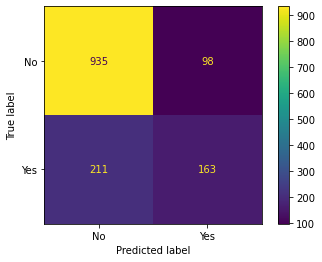

In [24]:
# compare predictions to actual answers
print('Confusion matrix')
print(confusion_matrix(predictions,y_test))
plot_confusion_matrix(clf, X_test, y_test) 
print('-------------------------------------------------------')
# accuracy_score
# fitted X_test data vs. y_test data (actual answer)
print('Accuracy score')
print(accuracy_score(predictions,y_test))
print('-------------------------------------------------------')
# classification report
print('Classification report')
print(classification_report(predictions,y_test)) 

### Managing imbalance in the dataset

10. Check for the imbalance.
11. Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
Each time fit the model and see how the accuracy of the model is.

In [25]:
data['Churn'].value_counts(dropna = False)

No     5163
Yes    1869
Name: Churn, dtype: int64

### Upsampling

In [26]:
data_up = pd.concat([X, y], axis = 1)
data_up

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,Churn
0,-1.280248,-0.440327,-1.161694,-0.994194,No
1,0.064303,-0.440327,-0.260878,-0.173740,No
2,-1.239504,-0.440327,-0.363923,-0.959649,Yes
3,0.512486,-0.440327,-0.747850,-0.195248,No
4,-1.239504,-0.440327,0.196178,-0.940457,Yes
...,...,...,...,...,...
7027,-0.343137,-0.440327,0.664868,-0.129180,No
7028,1.612573,-0.440327,1.276493,2.241056,No
7029,-0.872808,-0.440327,-1.170004,-0.854514,No
7030,-1.158016,2.271039,0.319168,-0.872095,Yes


In [27]:
category_1 = data_up[data_up['Churn'] == 'Yes']
category_0 = data_up[data_up['Churn'] == 'No']

# Upsampling 
# As we are going to repeat observations, the random samples can be picked more then once,
# threfore we need to use the keyword: replace=True
category_1 = category_1.sample(len(category_0), replace=True)  
print(category_1.shape)

data_up = pd.concat([category_0, category_1], axis=0)
#shuffling the data so train - we shuffle so train test receive random and proportionate blue-red 
data_up = data_up.sample(frac=1) #frac = 1 returns all the items, frac = 0.5 returns half


(5163, 5)


In [28]:
data_up['Churn'].value_counts()

No     5163
Yes    5163
Name: Churn, dtype: int64

In [29]:
X_up = data_up[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']]
y_up = data_up['Churn']

Confusion matrix
[[753 281]
 [309 723]]
-------------------------------------------------------
Accuracy score
0.7144240077444337
-------------------------------------------------------
Classification report
              precision    recall  f1-score   support

          No       0.71      0.73      0.72      1034
         Yes       0.72      0.70      0.71      1032

    accuracy                           0.71      2066
   macro avg       0.71      0.71      0.71      2066
weighted avg       0.71      0.71      0.71      2066



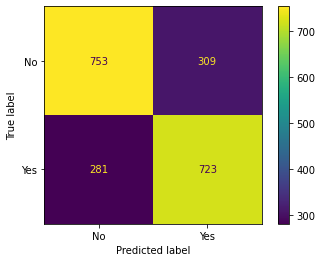

In [30]:
X_train, X_test, y_train, y_test = train_test_split \
            (X_up, y_up, test_size=0.2, random_state=42)
clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)
predictions = clf.predict(X_test)
# compare predictions to actual answers
print('Confusion matrix')
print(confusion_matrix(predictions,y_test))
plot_confusion_matrix(clf, X_test, y_test) 
print('-------------------------------------------------------')
# accuracy_score
# fitted X_test data vs. y_test data (actual answer)
print('Accuracy score')
print(accuracy_score(predictions,y_test))
print('-------------------------------------------------------')
# classification report
print('Classification report')
print(classification_report(predictions,y_test)) 

### Downsampling

In [31]:
data_down = pd.concat([X, y], axis = 1)

category_1 = data_down[data_down['Churn'] == 'Yes']
category_0 = data_down[data_down['Churn'] == 'No']



# We pick a random sample of rows from of observations belonging to "category_0"
# in the same amount of observations belonging to "category_1"
category_0 = category_0.sample(len(category_1))
print(category_0.shape)
print(category_1.shape)

data_down = pd.concat([category_0, category_1], axis=0)
#shuffling the data
data_down = data_down.sample(frac=1)

(1869, 5)
(1869, 5)


In [32]:
data_down['Churn'].value_counts()

Yes    1869
No     1869
Name: Churn, dtype: int64

In [33]:
X_d = data_down[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']]
y_d = data_down['Churn']

Confusion matrix
[[280  91]
 [105 272]]
-------------------------------------------------------
Accuracy score
0.7379679144385026
-------------------------------------------------------
Classification report
              precision    recall  f1-score   support

          No       0.73      0.75      0.74       371
         Yes       0.75      0.72      0.74       377

    accuracy                           0.74       748
   macro avg       0.74      0.74      0.74       748
weighted avg       0.74      0.74      0.74       748



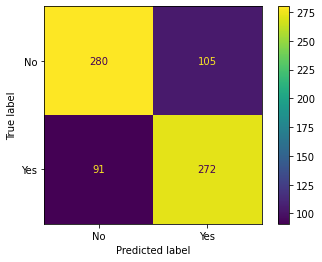

In [34]:
X_train, X_test, y_train, y_test = train_test_split \
            (X_d, y_d, test_size=0.2, random_state=42)
clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)
predictions = clf.predict(X_test)
# compare predictions to actual answers
print('Confusion matrix')
print(confusion_matrix(predictions,y_test))
plot_confusion_matrix(clf, X_test, y_test) 
print('-------------------------------------------------------')
# accuracy_score
# fitted X_test data vs. y_test data (actual answer)
print('Accuracy score')
print(accuracy_score(predictions,y_test))
print('-------------------------------------------------------')
# classification report
print('Classification report')
print(classification_report(predictions,y_test))

# Lab | Cross Validation

For this lab, we will build a model on customer churn binary classification problem. You will be using files_for_lab/Customer-Churn.csv file.

### Instructions

#### 1. Apply SMOTE for upsampling the data

* Use logistic regression to fit the model and compute the accuracy of the model.
* Use decision tree classifier to fit the model and compute the accuracy of the model.
* Compare the accuracies of the two models.

#### 2. Apply TomekLinks for downsampling

* It is important to remember that it does not make the two classes equal but only removes the points from the majority class that are close to other points in minority class.
* Use logistic regression to fit the model and compute the accuracy of the model.
* Use decision tree classifier to fit the model and compute the accuracy of the model.
* Compare the accuracies of the two models.
* You can also apply this algorithm one more time and check the how the imbalance in the two classes changed from the last time.

In [39]:
X = data[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']]
y = data[['Churn']]

### 1. Synthetic Minority Oversampling TEchnique (SMOTE) 
is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [40]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

X_sm, y_sm = smote.fit_sample(X, y)
y_sm['Churn'].value_counts()

No     5163
Yes    5163
Name: Churn, dtype: int64

Confusion matrix
[[762 278]
 [275 751]]
-------------------------------------------------------
Accuracy score
0.7323330106485963
-------------------------------------------------------
Classification report
              precision    recall  f1-score   support

          No       0.73      0.73      0.73      1040
         Yes       0.73      0.73      0.73      1026

    accuracy                           0.73      2066
   macro avg       0.73      0.73      0.73      2066
weighted avg       0.73      0.73      0.73      2066



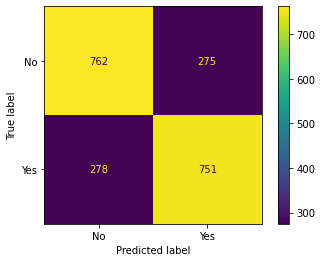

In [36]:
X_train, X_test, y_train, y_test = train_test_split \
            (X_sm, y_sm, test_size=0.2, random_state=42)

clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)
predictions = clf.predict(X_test)
# compare predictions to actual answers
print('Confusion matrix')
print(confusion_matrix(predictions,y_test))
plot_confusion_matrix(clf, X_test, y_test) 
print('-------------------------------------------------------')
# accuracy_score
# fitted X_test data vs. y_test data (actual answer)
print('Accuracy score')
print(accuracy_score(predictions,y_test))
print('-------------------------------------------------------')
# classification report
print('Classification report')
print(classification_report(predictions,y_test)) 

In [41]:
from sklearn.tree import DecisionTreeClassifier


In [42]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print("The accuracy of the model is: {:4.2f}".format(model.score(X_test, y_test)))

The accuracy of the model is: 0.73


#### -> Accuracy of both mpdels are the same 

### 2. Tomek links 
are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process. Apply imblearn.under_sampling.TomekLinks to the dataset. Build and evaluate the logistic regression model. Is it there any improvement

In [43]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks('majority')
X_tl, y_tl = tl.fit_sample(X, y)
y_tl['Churn'].value_counts()

No     4609
Yes    1869
Name: Churn, dtype: int64

Confusion matrix
[[796 188]
 [101 211]]
-------------------------------------------------------
Accuracy score
0.7770061728395061
-------------------------------------------------------
Classification report
              precision    recall  f1-score   support

          No       0.89      0.81      0.85       984
         Yes       0.53      0.68      0.59       312

    accuracy                           0.78      1296
   macro avg       0.71      0.74      0.72      1296
weighted avg       0.80      0.78      0.79      1296



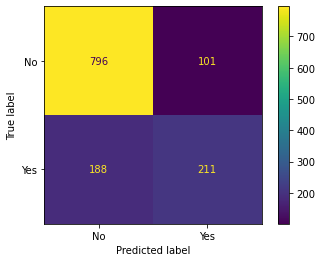

In [49]:
X_train, X_test, y_train, y_test = train_test_split \
            (X_tl, y_tl, test_size=0.2, random_state=42)
clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)
predictions = clf.predict(X_test)
# compare predictions to actual answers
print('Confusion matrix')
print(confusion_matrix(predictions,y_test))
plot_confusion_matrix(clf, X_test, y_test) 
print('-------------------------------------------------------')
# accuracy_score
# fitted X_test data vs. y_test data (actual answer)
print('Accuracy score')
print(accuracy_score(predictions,y_test))
print('-------------------------------------------------------')
# classification report
print('Classification report')
print(classification_report(predictions,y_test)) 

In [53]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print("The accuracy of the model is: {:4.2f}".format(model.score(X_test, y_test)))

The accuracy of the model is: 0.73


#### -> Now Linear works better

### WITH ALL THE DATA:

In [61]:
#Without under/oversampling: 
X_train, X_test, y_train, y_test = train_test_split \
            (X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print("The accuracy of the model is: {:4.2f}".format(model.score(X_test, y_test)))

The accuracy of the model is: 0.72


In [62]:
#Dummifying the wholw set
data_dum = pd.get_dummies(data, drop_first = True)
data_dum

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
2,0,2,53.85,108.15,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
3,0,45,42.30,1840.75,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,24,84.80,1990.50,1,1,1,1,0,1,0,0,0,1,0,1,0,1,0,1,1,0,0
7028,0,72,103.20,7362.90,0,1,1,1,0,0,0,1,0,1,0,0,0,1,0,1,1,0,0
7029,0,11,29.60,346.45,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7030,1,4,74.40,306.60,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [70]:
X = data_dum.drop(columns = ['Churn_Yes'], axis = 1)
y = data_dum[['Churn_Yes']]

In [71]:
X.shape

(7032, 22)

In [72]:
smote = SMOTE()

X_sm, y_sm = smote.fit_sample(X, y)
y_sm['Churn_Yes'].value_counts()

1    5163
0    5163
Name: Churn_Yes, dtype: int64

Confusion matrix
[[796 188]
 [101 211]]
-------------------------------------------------------
Accuracy score
0.7770061728395061
-------------------------------------------------------
Classification report
              precision    recall  f1-score   support

          No       0.89      0.81      0.85       984
         Yes       0.53      0.68      0.59       312

    accuracy                           0.78      1296
   macro avg       0.71      0.74      0.72      1296
weighted avg       0.80      0.78      0.79      1296



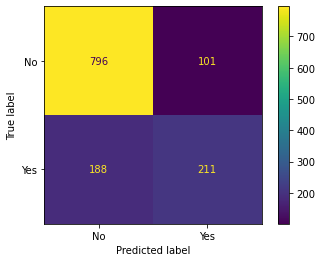

In [73]:
X_train, X_test, y_train, y_test = train_test_split \
            (X_tl, y_tl, test_size=0.2, random_state=42)
clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)
predictions = clf.predict(X_test)
# compare predictions to actual answers
print('Confusion matrix')
print(confusion_matrix(predictions,y_test))
plot_confusion_matrix(clf, X_test, y_test) 
print('-------------------------------------------------------')
# accuracy_score
# fitted X_test data vs. y_test data (actual answer)
print('Accuracy score')
print(accuracy_score(predictions,y_test))
print('-------------------------------------------------------')
# classification report
print('Classification report')
print(classification_report(predictions,y_test)) 

In [77]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print("The accuracy of the model is: {:4.2f}".format(model.score(X_test, y_test)))

The accuracy of the model is: 0.74


#### -> Linear improved, Tree - no

### CROSS VALIDATION

In [82]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

In [89]:
#cross-validation
cv = KFold(n_splits=10, random_state=42, shuffle=True)
model = LogisticRegression()
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.795 (0.017)


In [90]:
model = DecisionTreeClassifier()
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.717 (0.011)


In [91]:
#cross-validation - SMOTE
cv = KFold(n_splits=10, random_state=42, shuffle=True)
model = LogisticRegression()
scores = cross_val_score(model, X_sm, y_sm, scoring='accuracy', cv=cv)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.818 (0.016)


In [92]:
model = DecisionTreeClassifier()
scores = cross_val_score(model, X_sm, y_sm, scoring='accuracy', cv=cv)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.791 (0.014)


### CROSS VALIDATION PIPELINE

In [95]:
model1 = DecisionTreeClassifier()
model2 = LogisticRegression()

model_pipeline = [model1, model2]
model_names = ['DecisionTreeClassifier', 'LogisticRegression']

X_train, X_test, y_train, y_test = train_test_split \
            (X_sm, y_sm, test_size=0.2, random_state=42)

In [98]:
from scipy.stats import t, norm

def func(model_pipeline, model_names, X_train, y_train, alpha = 0.05, K = 10):
    
# We set the significance level
#alpha = 0.05
#K = 10
    scores = {}
    i=0
    for model in model_pipeline:
        mean_score = np.mean(cross_val_score(model, X_train, y_train, cv= K))
        if (K < 30):
            t_critical = abs(t.ppf(alpha, K-1))
            interval = t_critical*(np.std(cross_val_score(model, X_train, y_train, cv=K))/np.sqrt(K))
        else:
            z_critical = abs(norm.ppf(1-alpha/2))
            interval = z_critical*(np.std(cross_val_score(model, X_train, y_train, cv=K))/np.sqrt(K))
        scores[model_names[i]] = [mean_score, mean_score - interval, mean_score + interval]
        print("The rmse of the {} model is (CV witk K={}) {:4.2f} +/- {:4.2f}".format(model_names[i], K, mean_score, interval))
        i = i+1
    #print(scores)

In [99]:
func(model_pipeline, model_names, X_train, y_train, alpha = 0.01, K = 10)

The rmse of the DecisionTreeClassifier model is (CV witk K=10) 0.79 +/- 0.01
The rmse of the LogisticRegression model is (CV witk K=10) 0.82 +/- 0.01


## Lab | Random Forests

For this lab, you will be using the CSV files provided in the files_for_lab folder.

### Instructions

Apply the Random Forests algorithm but this time only by upscaling the data using SMOTE.
Note that since SMOTE works on numerical data only, we will first encode the categorical variables in this case.

In [ ]:
#Using encoded data from the labs above

In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
print("The accuracy of the Random forest is: {:4.2f}".format(clf.score(X_test, y_test)))
print()

alpha = 0.05
K = 10
# For cross validation
clf = RandomForestClassifier(max_depth=2, random_state=0)
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=10)

if (K < 30):
    t_critical = abs(t.ppf(alpha, K-1))
    interval = t_critical*(np.std(cross_val_score(clf, X_train, y_train, cv=10))/np.sqrt(K))
else:
    z_critical = abs(norm.ppf(1-alpha/2))
    interval = z_critical*(np.std(cross_val_score(clf, X_train, y_train, cv=10))/np.sqrt(K)) 
print("The accuracy of the Random Forest model (CV witk K=10) is: {:4.2f} +/- {:4.2f}".format(np.mean(cross_val_scores),interval))

The accuracy of the Random forest is: 0.79

The accuracy of the Random Forest model (CV witk K=10) is: 0.79 +/- 0.01
